
# Project: Investigate a No-show appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dataset: No-show appointments

> Description: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

> Questions: 
    - What are the possible factors to signify if a patient will show?
    - What day of the week is there a high volume of appointments? Analyzing each day, what percentage of total appointments does each day carry?

Data Types:
- Age: indicates the patient's age.
- Neighborhood: indicates the location of the hospital.
- Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Hipertension: indicates whether or not the patient is experiencing Hypertension.
- Diabetes: indicates whether or not the patient is experiencing Diabetes.
- Alcoholism: indicates whether or not the patient is experiencing Alcoholism.
- Handcap: indicates whether or not the patient is with special needs.
- SMS_received: indicates whether or not the patient has received a reminder text message.
- Show-up: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
- PatientId: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.
- AppointmentID: indicates appoint ID, this field should be unique
- Gender: indicates the patient's gender (M/F)
- ScheduledDay: indicates the Date/Time the patient set up their appointment.
- AppointmentDay: indicates the date/time the patient called to book their appointment.

In [53]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [54]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Noshowdataset-KaggleV2-May-2016.csv')

In [55]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 14 columns and 110527 data rows

In [56]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
df.shape

(110527, 14)

In [58]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


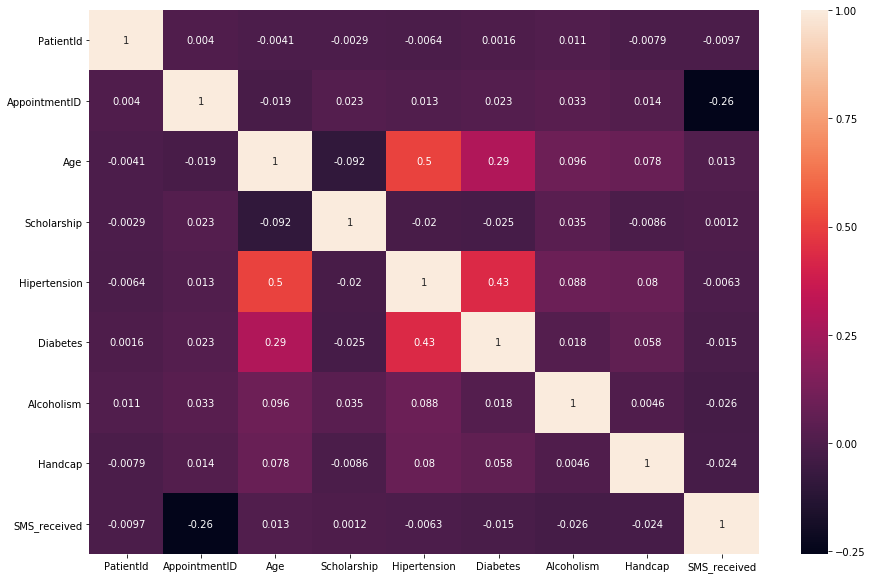

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

Heat map explanation: 
1st most corrolation between Age and Hypertension 
2nd most correlation between Hypertension and Diabetes
Quantitative Data: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay
Categorical Data: Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show

In [60]:
# Check if there is any missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [61]:
# Checking for duplicate rows 
df.duplicated().sum()

0

In [62]:
# Checking for duplicate appointmentID

sum(df.AppointmentID.duplicated())

0

In [63]:
# Checking for duplicate PatientID
sum(df.PatientId.duplicated())

48228

In [64]:
df.PatientId.value_counts().head(10)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

PatientId column contains repeated values, meaning patients booked more than one appointment. We see that the top 10 patients that booked the largest number of appointments.



### Data Cleaning

In [65]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [66]:
# Rename the column name
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [67]:
# make'no_show' column only 'Yes' and 'No'
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [68]:
# Replace Yes for Absent and No for Present
df['no_show'].replace({'No':'Present', 'Yes':'Absent'}, inplace=True)

In [69]:
# Check the age range
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [70]:
# Drop the irrelvant age rows
df.drop(df[(df.age < 0) | (df.age > 99)].index, inplace=True)

In [71]:
df['age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99])

In [72]:
# Drop those columns that are not important for the analysis
df.drop(['patientid', 'appointmentid', ], axis=1, inplace=True)

In [73]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Present


<a id='eda'></a>
## Exploratory Data Analysis



In [74]:
# total amount of present
present = (df.no_show == 'Present').sum()
present

88199

In [75]:
# total amount of absent
absent = (df.no_show == 'Absent').sum()
absent

22316

In [76]:
# Percentage of absent and present
(absent/(present + absent)*100, present/(present + absent)*100)

(20.192734018006604, 79.807265981993396)

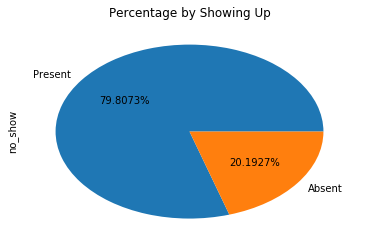

In [77]:
# Plot the pie chart: overall appointment show-up vs. no show-up rate?
df['no_show'].value_counts().plot(kind='pie', title = 'Percentage by Showing Up', autopct='%1.4f%%');

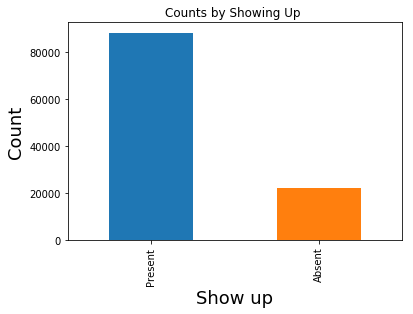

In [78]:
# Plot the bar chart for the present and absent
df['no_show'].value_counts().plot(kind='bar', title = 'Counts by Showing Up ')
plt.xlabel('Show up', fontsize=18)
plt.ylabel('Count', fontsize=18);

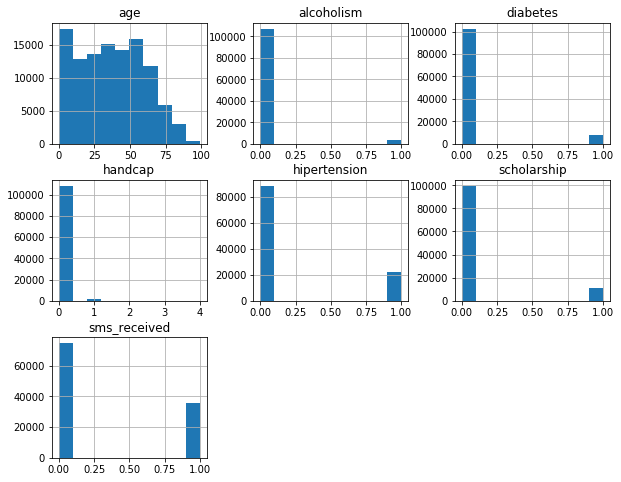

In [79]:
# Explore the data distribution for each variable
df.hist(figsize =(10, 8));

The histogram data shows A frequency distribution of how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions. We can see this clearly in the graphs above. 

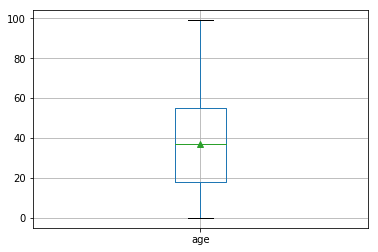

In [80]:
# boxplot for age
df.boxplot(['age'], showmeans=True);

mean: 37, 25%: 18, 75%: 55

# Research Question 1: Factors to signify if a patient will show.

## What are the possible factors to signify if a patient will show?
### Comparing groupby data with bar chart and pie chart to see significance. 

In [81]:
# Function for pie plot
def plot_pie(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by '+variable+ ' Showing Up', autopct='%1.1f%%')
    plt.ylabel('');

In [82]:
# Function for bar plot
def plot_bar(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by '+variable+ ' Showing Up')
    plt.xlabel(variable, fontsize=18)
    plt.ylabel('Count', fontsize=18);

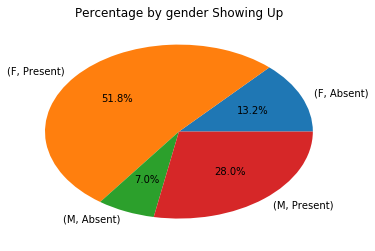

In [83]:
# Pie chart for variable 'gender' with no_show
plot_pie('gender')

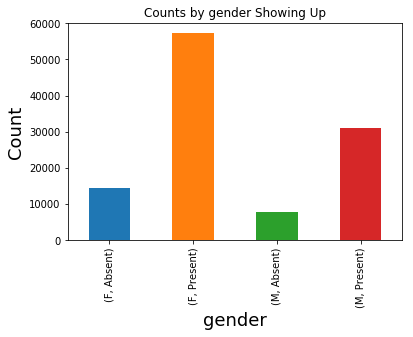

In [84]:
# Bar chart for variable 'gender' with no_show
plot_bar('gender')

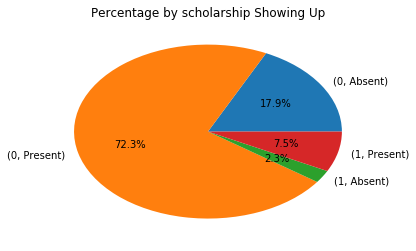

In [85]:
# Pie chart for variable 'scholarship' with no_show
plot_pie('scholarship')

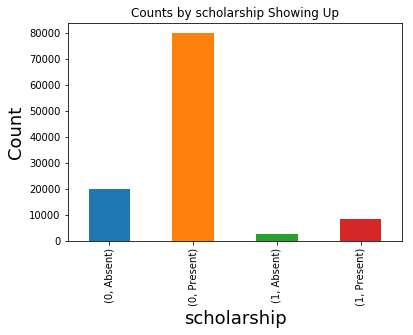

In [86]:
# Bar chart for variable 'scholarship' with no_show
plot_bar('scholarship')

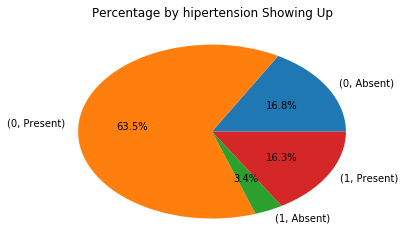

In [87]:
# Pie chart for variable 'hipertension' with no_show
plot_pie('hipertension')

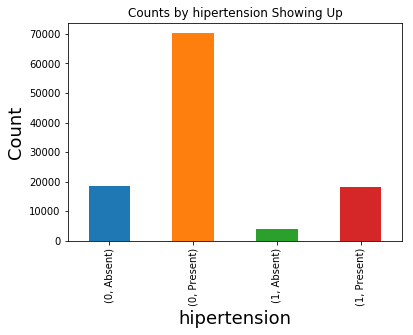

In [88]:
# Bar chart for variable 'hipertension' with no_show
plot_bar('hipertension')

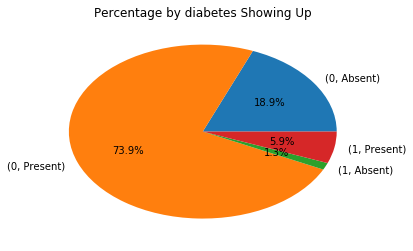

In [89]:
# Pie chart for variable 'diabetes' with no_show
plot_pie('diabetes')

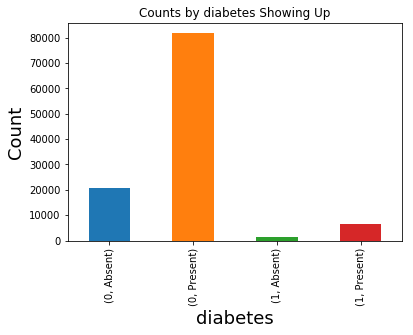

In [90]:
# Bar chart for variable 'diabetes' with no_show
plot_bar('diabetes')

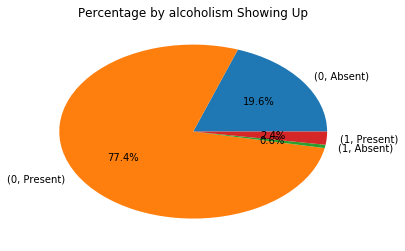

In [91]:
# Pie chart for variable 'alcoholism' with no_show
plot_pie('alcoholism')

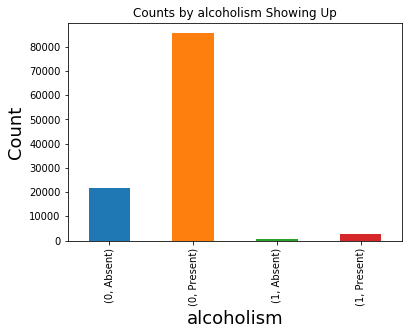

In [92]:
# Bar chart for variable 'alcoholism' with no_show
plot_bar('alcoholism')

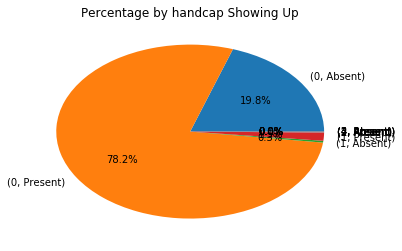

In [93]:
# Pie chart for variable 'handcap' with no_show
plot_pie('handcap')

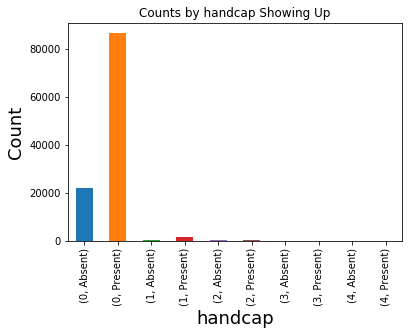

In [94]:
# Bar chart for variable 'handcap' with no_show
plot_bar('handcap')

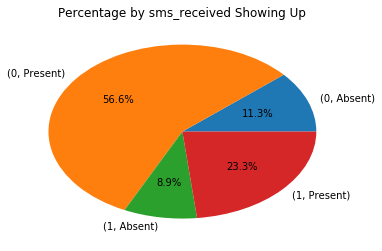

In [95]:
# Pie chart for variable 'sms_received' with no_show
plot_pie('sms_received')

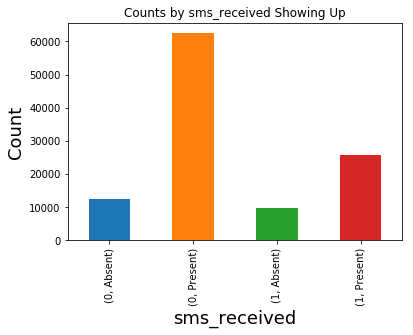

In [96]:
# Bar chart for variable 'sms_received' with no_show
plot_bar('sms_received')

Result:
We can see from the data that their are two significant factors that can predict wheather or not a patient will show up for their appointment. We have seen that the highest attendance rate is handcap with variable zero at 78.2%. Second being, alcoholism variable at 77.4% attendance rate that who are not alcoholism. 

### Research Question 2 : Volume days

In [97]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

### What day of the week is there a high volume of appointments? Analyzing each day, what percentage of total appointments does each day carry?

In [98]:
# Change appointmentday data from object to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [99]:
# new column name 'weekday' from 0 to 6 where 0 is Monday 6 is Sunday
df['days']=df['appointmentday'].dt.dayofweek

0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

In [100]:
df['days'].nunique()

6

In [101]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days
0,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,4
1,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,4
2,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,4
3,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,4
4,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,4


In [102]:
# look at total count of appointment made by day
df_day = df.groupby(['days']).count()['age']
df_day

days
0    22712
1    25637
2    25866
3    17244
4    19017
5       39
Name: age, dtype: int64

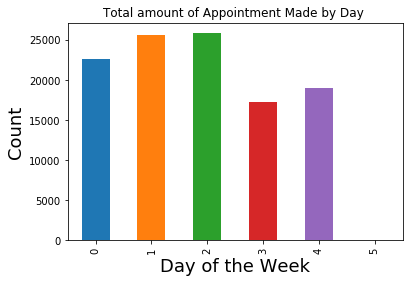

In [103]:
# total amount of appointment made by day in bar chart
df_day.plot(kind='bar', title = 'Total amount of Appointment Made by Day ')
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Count', fontsize=18);

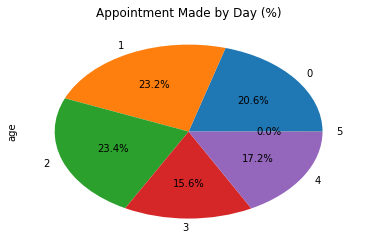

In [104]:
# total amount of appointment made by day in pie chart
df_day.plot(kind='pie', title = 'Appointment Made by Day (%)', autopct='%1.1f%%');

Highest total amount of appointments 25867 (23%): Wednesday
Second highest total amount of appointments made 25640 (23.2%): Tuesday 
Lowest total amount of appointment made 39: Saturday
No record suggesting they are not open: Sunday

<a id='conclusions'></a>
## Conclusions

Research question number 1 tells us that handcap and alcholism show significant when predicting if a patient will show to an appointment. Research questions number 2 tells us that Wendesday is more booked than anyother day, meaning it is when business is more busy, this is followed by Tuesday being second most busy day. The charts (pie) helped us describe visually wha the data was telling us. 

Limitations: 

- Cacluations mainly made on the quantity of appointments, not patients. 
- Times of appointments were not included which means time of day was an aspect that was not analyzed. 
- Columns consisted of categorical data, meaning bar/pie charts were more useful than quanitative charts such as histograms and scatter plots. 
